In [19]:
from google.colab import drive
import cv2
import matplotlib.pyplot as plt

In [20]:
# mounting Google Drive
drive.mount('/content/drive')

# Path to your video on Google Drive
video_path = '/content/drive/My Drive/B180-CLOUD-VIDEO/LaurierHD/100007.MTS'
cap = cv2.VideoCapture(video_path)

!ls '/content/drive/My Drive/B180-CLOUD-VIDEO/LaurierHD/100007.MTS'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'/content/drive/My Drive/B180-CLOUD-VIDEO/LaurierHD/100007.MTS'


In [21]:
if not cap.isOpened():
    print("Error: Couldn't open the video file.")
    # Attempt conversion if the file can't be read
    !apt-get install ffmpeg  # Install FFmpeg if not installed
    converted_path = '/content/drive/My Drive/B180-CLOUD-VIDEO/LaurierHD/100007_converted.mp4'
    !ffmpeg -i "$video_path" -c:v libx264 -crf 23 -preset medium "$converted_path"
    print(f"Converted .MTS to .mp4 at: {converted_path}")
    cap = cv2.VideoCapture(converted_path)  # Re-try with the converted video file

if not cap.isOpened():
    print("Error: Couldn't open the video file, even after conversion.")
else:
    print("Video file opened successfully.")

Video file opened successfully.


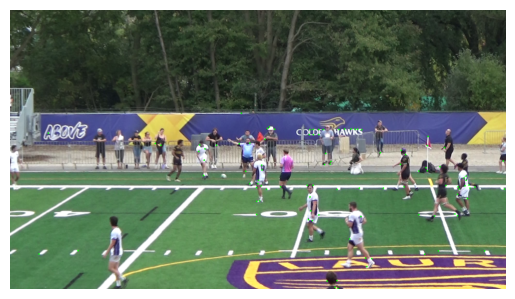

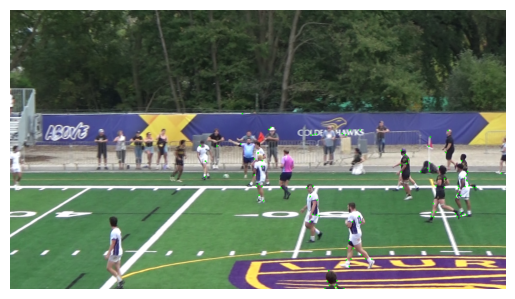

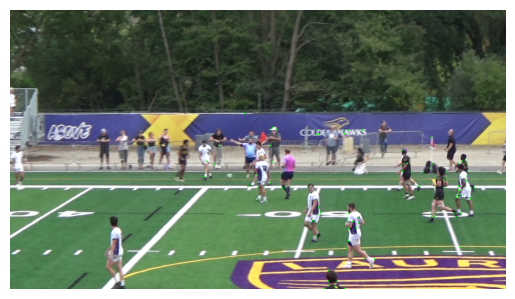

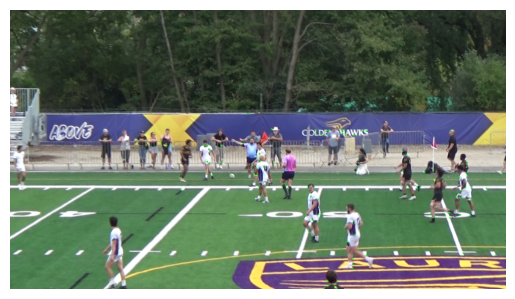

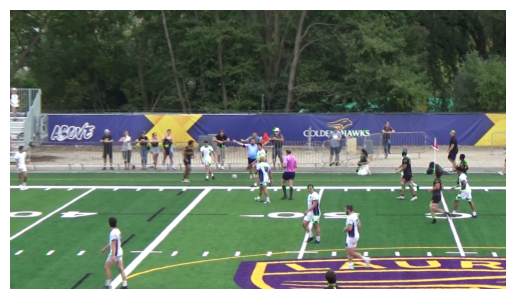

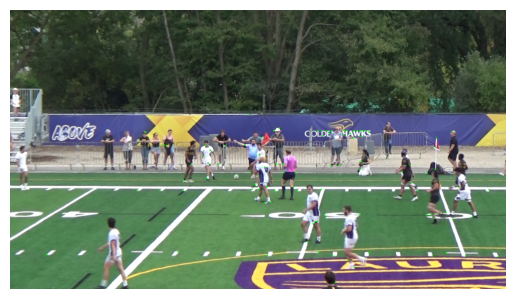

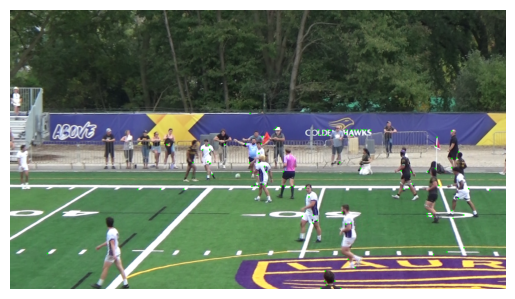

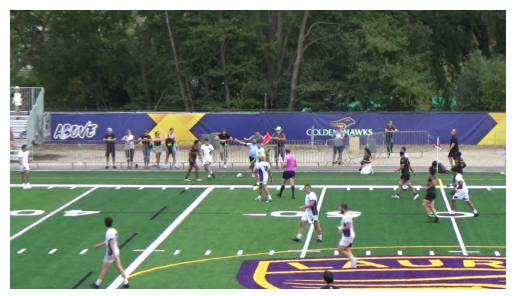

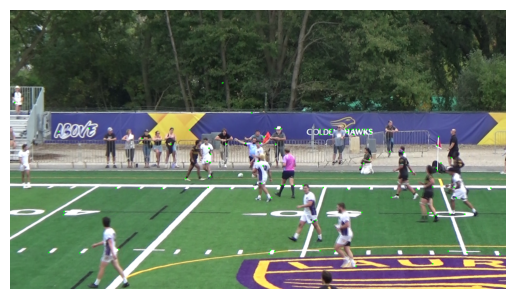

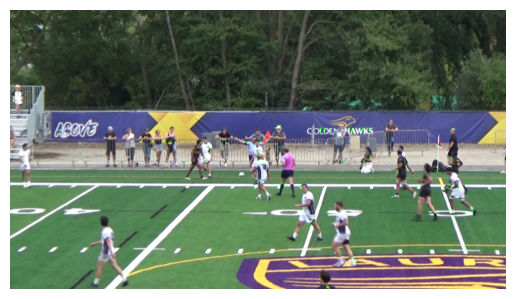

In [22]:
frame_count = 0
num_frames_to_display = 10

while cap.isOpened() and frame_count < num_frames_to_display:
    ret, frame = cap.read()  # Attempt to read a frame
    if not ret:
        print("End of video or error reading frame.")
        break

    # Ensure the frame is not empty before processing
    if frame is None or frame.size == 0:
        print("Warning: Empty or invalid frame encountered.")
        continue

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    corners = cv2.goodFeaturesToTrack(
        gray_frame,        # Input image in grayscale
        maxCorners=100,    # Maximum number of corners to detect
        qualityLevel=0.01, # Minimum accepted quality of corners
        minDistance=10     # Minimum distance between detected corners
    )

    if corners is not None:
        for corner in corners:
            x, y = corner.ravel()    # Flatten the corner array to get x, y coordinates
            x, y = int(x), int(y)    # Convert coordinates to integers for OpenCV
            cv2.circle(frame, (x, y), 3, (0, 255, 0), -1)  # Draw circle at each corner
    else:
        print("No corners found in this frame.")

    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))  # Convert color for Matplotlib display
    plt.axis('off')  # Hide axis
    plt.show()
    plt.pause(0.001)  # Helps force display rendering in some environments

    # Increase the frame counter
    frame_count += 1

# Release resources
cap.release()

Frame shape: (1080, 1920, 3)
Frame type: <class 'numpy.ndarray'>


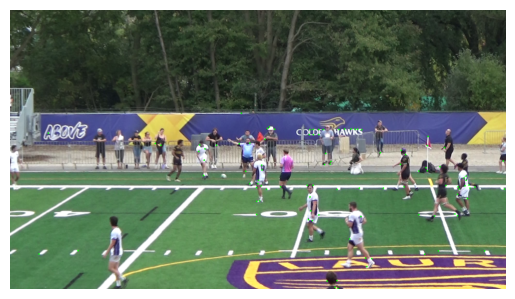

In [15]:
ret, frame = cap.read()  # Attempt to read the first frame
if not ret:
    print("Error: Couldn't read the frame.")
elif frame is None or frame.size == 0:
    print("Warning: Empty or invalid frame encountered.")
else:
    print("Frame shape:", frame.shape)
    print("Frame type:", type(frame))

    # Convert to grayscale and detect corners if frame is valid
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    corners = cv2.goodFeaturesToTrack(
        gray_frame, maxCorners=100, qualityLevel=0.01, minDistance=10
    )

    # Draw detected corners
    if corners is not None:
        for corner in corners:
            x, y = corner.ravel()
            x, y = int(x), int(y)
            cv2.circle(frame, (x, y), 3, (0, 255, 0), -1)
    else:
        print("No corners found in this frame.")

    # Display the frame
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    plt.pause(0.001)  # Helps force display rendering in some environments

In [16]:
cap.release()

In [17]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("End of video or error reading frame.")
        break

    # Additional frame validity check
    if frame is None or frame.size == 0:
        print("Warning: Empty or invalid frame encountered.")
        continue

    # Step 5: Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Step 6: Apply GFTT corner detection
    corners = cv2.goodFeaturesToTrack(
        gray_frame, maxCorners=100, qualityLevel=0.01, minDistance=10
    )

    # Step 7: Draw detected corners
    if corners is not None:
        for corner in corners:
            x, y = corner.ravel()
            x, y = int(x), int(y)
            cv2.circle(frame, (x, y), 3, (0, 255, 0), -1)
    else:
        print("No corners found in this frame.")

    # Display the frame
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Stop after displaying one frame in Colab
    break

In [9]:
cap.release()
cv2.destroyAllWindows()
#